# Project Report

## Research Question

The film industry is interestingly where art and commerce intersect. Films not only serve as a medium for storytelling and cultural expression but also represent a significant global economic force, generating billions annually. 

Our interaction with film and the industry has been in the context of a consumer. Being able to understand what drives audiences to theaters will allow us to gain a deeper understanding of film through a different perspective. As an industry with so much culture and history, we hope to explore the story of cinema. 

For filmmakers, investors, and researchers, understanding the drivers of box office success can be valuable in predicting outcomes, allocating resources effectively, and designing films that resonate with audiences. One research study demonstrated that the greatest determinants of a movie’s box office success are production cost, distribution studio, and award nominations (Pangarker and Smit, 2013). Another research study concluded that star power (the average box office revenue generated by films involving an actor/director during their career up to the year in question) was the single most important factor that influenced a movie’s box office revenue (Yang and Selvaretnam, 2015). 

We hope to explore: **How do factors such as budget, runtime, release date, ratings, and votes influence a movie's box office success, and which are the most influential?**

## Data Description

To answer this question, we will be using a dataset from Kaggle, consisting of data collected from GroupLens and TMDB. GroupLens has compiled movie rating datasets that we will use for our project. The TMDB API was used to collect additional data on movie details, credits, and keywords.

**What are the observations (rows) and the attributes (columns)?**  
Rows: each row in the dataset represents a unique movie.  
Columns:
- belongs_to_collection: The series that the movie is a part of, if applicable
- budget: The budget used to produce the movie, in dollars
- genres: The genres that the movie is a part of
- id: The identifier for the movie used by MovieLens
- imdb_id: The identifier for the movie used by IMDB
- original_language: The original language that the movie was produced in
- original_title: The original title of the movie
- popularity: The popularity of the movie as measured by MovieLens
- production_companies: The companies involved in the production of the movie
- production_countries: The countries in which the movie was produced
- release_date: The date on which the movie was released
- revenue: The revenue generated from the movie, in dollars
- runtime: The length of the movie, in minutes
- spoken_languages: The languages spoken in the movie
- title: The title of the movie
- vote_average: The average vote of the movie by TMDB users, out of 10
- vote_count: The number of votes received by the movie on TMDB
- rating_average: The average rating of the movie by MovieLens users, out of 5
- rating_count: The number of ratings received by the movie on MovieLens

**Why was this dataset created?**  
This dataset was created by an individual on Kaggle for a capstone project. The project explores data on movies to examine the history of cinema. The data was also used to develop different kinds of recommendation systems. The Kaggle dataset draws data from GroupLens and TMDB.

GroupLens, a research lab at the University of Minnesota, Twin Cities. The group is made up of students and faculty in the university's Department of Computer Science and Engineering. GroupLens studies social computing by building systems and analyzing their use by people. One of these systems is MovieLens, a website with thousands of registered that helps people find movies to watch. The platform is used to help researchers study content recommendation, user interface design, and other areas of interest. In creating the website, GroupLens compiled movie rating datasets that were used for this dataset.

The TMDB API contains data on movie details, such as the movie's title, original language, genres, popularity, and release date. The API can also be used to find the average TMDB vote of movies, as well as the number of TMDB votes.

**Who funded the creation of the dataset?**  
The dataset was created by an individual for a capstone project. Its creation likely did not receive any funding.

**What processes might have influenced what data was observed and recorded and what was not?**  
The dataset relies solely on APIs from TMDB and GroupLens, which means the quality and completeness of the data depend on how these sources collect and maintain their records. If certain movies are less documented or if there are inconsistencies in data entry, this could result in missing or incomplete metadata. Movie ratings are inherently subjective and can vary significantly based on individual viewer preferences, cultural context, and personal experiences. This subjectivity introduces variability that may not accurately reflect the overall quality or success of a film. 

**What preprocessing was done, and how did the data come to be in the form that you are using?**  
The raw source data was taken from 45,000 movies listed in the Full MovieLens Dataset. The dataset is an ensemble of data collected from TMDB and GroupLens. The Movie Details, Credits and Keywords have been collected from the TMDB Open API. The Movie Links and Ratings have been obtained from the Official GroupLens website. The dataset consists of movies released on or before July 2017. The data has been processed in our data cleaning notebook, https://github.com/ay283/info2950_project/blob/main/Data%20Cleaning.ipynb. Our steps are described in this notebook.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**  
The individual who created the dataset posted it for public use on Kaggle. There is a CC0: Public Domain license which means this dataset has been dedicated to the public domain because the creator has waived all of their rights to the work worldwide under copyright law. They hope that the dataset can help predict movie revenue/success based on certain metrics. 

**Where can your raw source data be found, if applicable? Provide a link to the raw data.**  
https://grouplens.org/datasets/movielens/latest/

## Load Data

In [1]:
import numpy as np
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
data = pd.read_csv("data/data.csv")
print(data.shape)
data.head()

(1030, 17)


,belongs_to_collection,budget,genres,id,original_english,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,month,holiday,rating_average,rating_count
0,0,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",508,1,Love Actually,10.586815,2003-09-07,244931766.0,135.0,Love Actually,7.0,1917.0,9,0,3.668605,86
1,0,42000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",509,1,Notting Hill,9.874043,1999-05-13,363889678.0,124.0,Notting Hill,7.0,1309.0,5,0,3.750000,78
2,1,65000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1271,1,300,18.108408,2006-12-09,422610419.0,117.0,300,7.0,5092.0,12,1,3.700000,40
3,0,24000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1089,1,Point Break,11.453093,1991-07-12,83531958.0,120.0,Point Break,6.9,861.0,7,1,4.162879,132
4,1,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",2770,1,American Pie 2,10.251030,2001-08-10,287553595.0,108.0,American Pie 2,6.0,1375.0,8,1,3.068627,51


## Exploratory Data Analysis

### Scatterplot of Revenue, Budget, and Popularity

Text(0.5, 1.0, 'Revenue of Movies by Budget and Popularity')

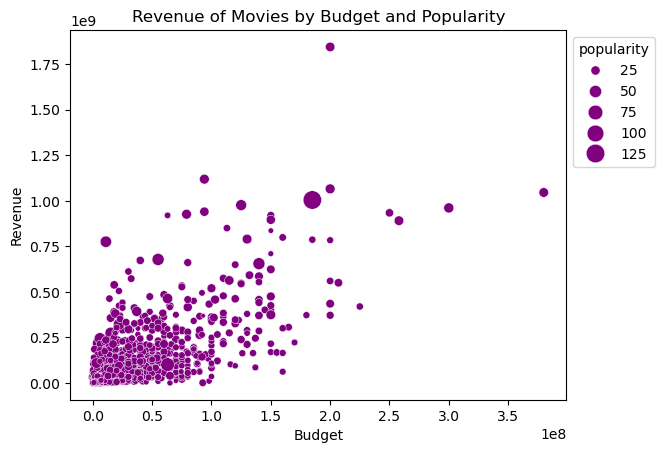

In [3]:
plot = sns.scatterplot(data, x='budget', y='revenue', color='purple', size='popularity', sizes=(10,200))
sns.move_legend(plot, 'upper left', bbox_to_anchor=(1,1))
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue of Movies by Budget and Popularity')

This plot shows that there is a slight positive correlation between budget and revenue. The variable popularity does not have a clear correaltion with either of the other two variables.

### Scatterplot of Release Date and Revenue

Text(0.5, 1.0, 'Revenue of Movies by Release Date and Runtime')

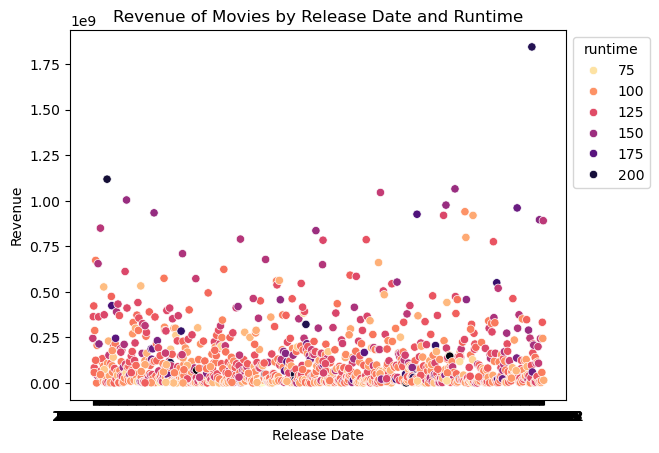

In [4]:
plot = sns.scatterplot(data, x='release_date', y='revenue', hue='runtime', palette='magma_r')
sns.move_legend(plot, 'upper left', bbox_to_anchor=(1,1))
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.title('Revenue of Movies by Release Date and Runtime')

We can see that the revenue generated by movies has generally had the same variation over the years. In addition, the majority of the movies have a runtime of about 100 minutes. Movies with the highest amount of revenue generated tend to be longer in runtime.

### Correlation Matrix of Numeric Variables

Text(0.5, 1.0, 'Correlation Matrix of Numeric Variables')

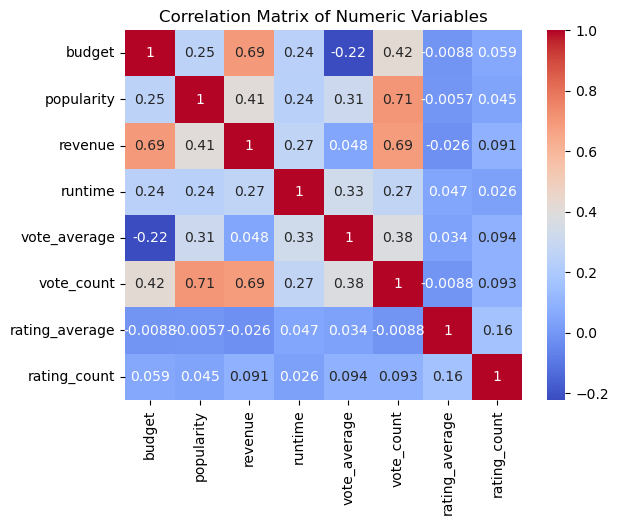

In [5]:
data_numeric = data[['budget', 'popularity', 'revenue', 'runtime',
                     'vote_average', 'vote_count', 'rating_average', 'rating_count']]
data_corr = data_numeric.corr()
sns.heatmap(data_corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Numeric Variables')

From this matrix, we can see that revenue and budget have a high positive correlation. In addition, revenue has a high positive correlation with the number of TMDB votes received by the movie.

## Preregistration Statement

### Hypothesis: Movies with a greater budget (dollars used for production) have higher box office success compared to movies with a lower budget.

#### $H_{0}$: There is no relationship between budget and revenue

In general, a higher budget suggests that more resources and effort were put into the making of a movie. We believe this is an indicator of a higher quality movie, which would likely generate more revenue. Looking at the correlation above, revenue and budget have a strong positive correlation of 0.76. This means a greater budget is typically associated with higher revenue.

In [6]:
# Code modeled after HW4 A5
input_vars = ['budget', 'runtime']
train, test = train_test_split(data, test_size=0.2)
X = data[input_vars]
y = data['revenue']
model = LinearRegression().fit(X, y)

Although our hypothesis only concerns the movie's budget, we included an additional variable, `runtime`. From our correlation matrix, we can see that `runtime` is not heavily correlated with `revenue`. Thus, it can serve as a control that we can compare the effects of `budget` against.

In [7]:
train_pred = model.predict(train[input_vars])
test_pred = model.predict(test[input_vars])

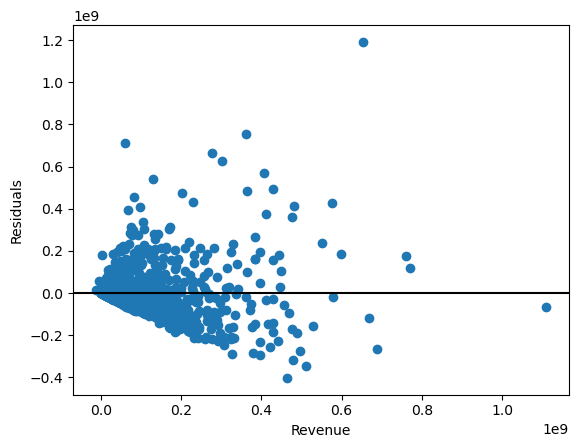

In [8]:
# Code modeled after HW4 A13
residuals = train['revenue'] - train_pred

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred, residuals)

The residual plot is very clustered and not random, so we will transform some of the variables.

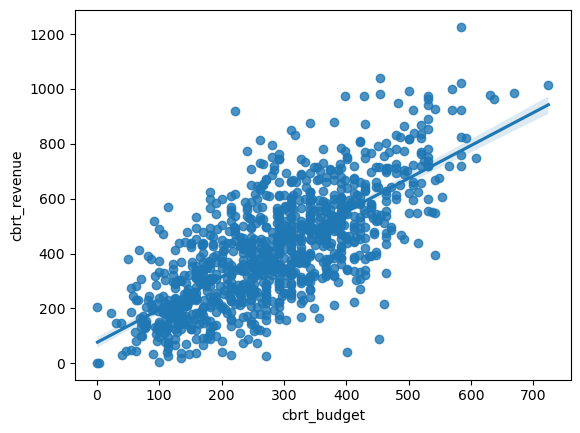

In [9]:
# Use cube root transformation on budget and revenue
data['cbrt_budget'] = np.cbrt(data['budget'])
data['cbrt_revenue'] = np.cbrt(data['revenue'])

# Plot the transformed variables with each other to observe their relationship
ax = sns.regplot(data, x='cbrt_budget', y='cbrt_revenue')

The relationship between the cubed root transformation of budget and the cubed root transformation is fairly linear.

In [10]:
input_vars = ['cbrt_budget', 'runtime']
train, test = train_test_split(data, test_size=0.2)
X = data[input_vars]
y = data['cbrt_revenue']
model = LinearRegression().fit(X, y)

In [12]:
train_pred = model.predict(train[input_vars])
test_pred = model.predict(test[input_vars])

In [13]:
train_mean = np.mean((train['cbrt_revenue'] - train_pred) ** 2)
train_rmse = round(np.sqrt(train_mean), 2)
test_mean = np.mean((test['cbrt_revenue'] - test_pred) ** 2)
test_rmse = round(np.sqrt(test_mean), 2)
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 143.37
Test RMSE: 132.19


In [14]:
train_mae = np.mean(np.abs(train['cbrt_revenue'] - train_pred))
test_mae = np.mean(np.abs(test['cbrt_revenue'] - test_pred))
print(f"Train MAE: {round(train_mae, 2)}")
print(f"Test MAE: {round(test_mae, 2)}")

Train MAE: 111.94
Test MAE: 106.73


The RMSE and MAE values are very similar between the training and test data, with the test evaluation metrics slightly lower than the training metrics. This means that the accuracy of the model's predictions is consistent on old and new data. Thus, the model generalizes well out of sample.

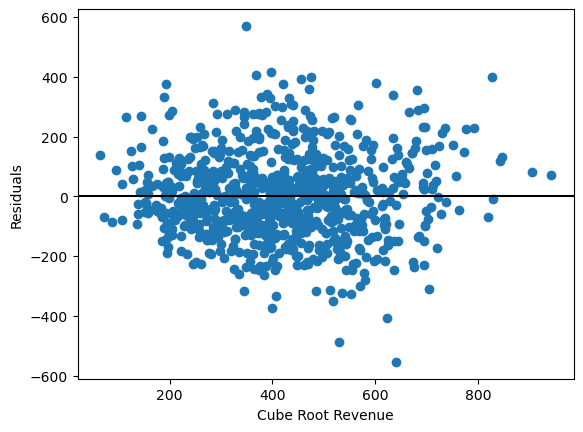

In [15]:
residuals = train['cbrt_revenue'] - train_pred

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Cube Root Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred, residuals)

The residual plot for the transformed variables is random and scattered, meaning a linear regression is appropriate for this data.

In [16]:
Y = data['cbrt_revenue']
x = data[input_vars]
x = sm.add_constant(x)
model = sm.OLS(Y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           cbrt_revenue   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     571.2
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.71e-167
Time:                        19:26:38   Log-Likelihood:                -6560.2
No. Observations:                1030   AIC:                         1.313e+04
Df Residuals:                    1027   BIC:                         1.314e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.8764     24.070     -0.286      

The coefficient for the transformed budget is 1.16, meaning that for every 1% increase in the movie's budget, the revenue is expected to increase by 1.16%, all else equal.

As for the runtime, for every 1% increase in the movie's runtime, the revenue is expected to increase by 0.81%, all else equal. Both budget and runtime have a positive correlation with revenue.

The p_value for `cbrt_budget` is 0.000, which is lower than our significance level of 0.05. This means that this value is statistically significant, and we can reject our null hypothesis that there is no relationship between budget and revenue. 

## Preregistration Statement

### Hypothesis: Movies released in holiday seasons (Summer and Winter) have higher box office success compared to movies released in the Spring and Fall seasons.

#### $H_{0}$: There is no relationship between season the movie was released (holiday vs non-holiday) and revenue

Looking at our scatterplot of release date vs revenue from exploratory data analysis, there is no evident correlation between these variables. However, we believe that there may be an association between the season of release and revenue generated. During the summer and winter, people tend to have more free time, whether it is due to summer break or the winter holidays. We grouped these two seasons into a holiday variable, with fall and spring as non-holiday seasons. Due to the increase in free time during these seasons, we speculate that people are more inclined to watch movies that are released at this time. Thus, we believe that a release date in a holiday season (summer or winter) is correlated with a higher revenue.

In [17]:
input_vars = ['holiday', 'rating_average', 'vote_average']
train, test = train_test_split(data, test_size=0.2)
X = data[input_vars]
y = data['revenue']
model = LinearRegression().fit(X, y)

Although our hypothesis only concerns the movie's season of release, we included additional variables, `rating_average` and `vote_average`. From our correlation matrix, we can see that these variables are not heavily correlated with `revenue`. Thus, they can serve as control variables that we can compare the effects of `holiday` against.

In [18]:
train_pred = model.predict(train[input_vars])
test_pred = model.predict(test[input_vars])

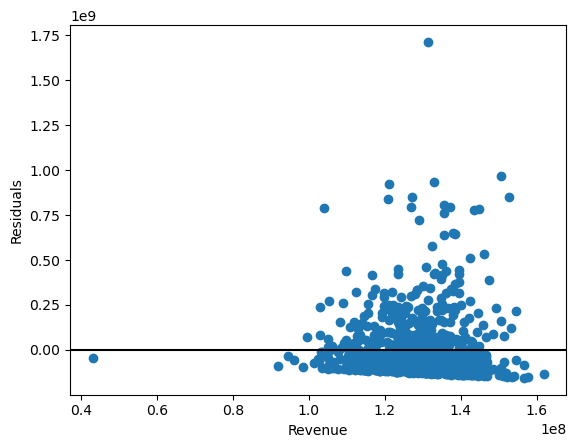

In [19]:
residuals = train['revenue'] - train_pred

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred, residuals)

The residual plot has a large cluster and is not random, so we will transform some of the variables.

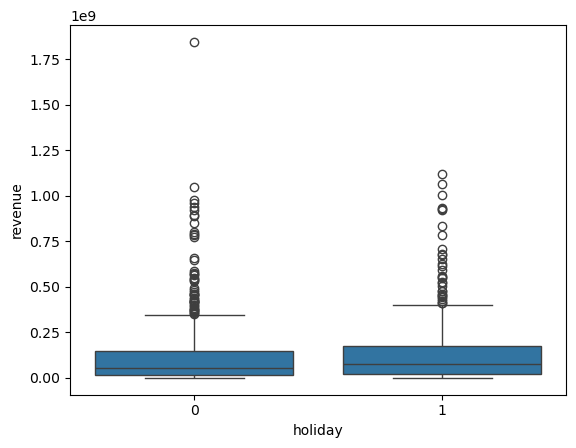

In [20]:
# Plot holiday with revenue to observe their relationship
ax = sns.boxplot(data, x='holiday', y='revenue')

The boxplots are very skewed, with a strong right skew and many outliers in the `revenue` values. This suggests that we should transform the `revenue` variable.

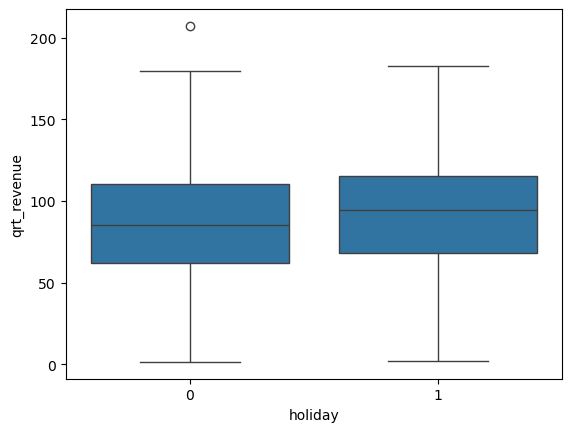

In [21]:
# Use quartic root transformation on revenue
data['qrt_revenue'] = data['revenue'] ** (1/4)

# Plot the transformed variable with holiday to observe their relationship
ax = sns.boxplot(data, x='holiday', y='qrt_revenue')

The boxplots for the different values of `holiday` do not reveal a strong relationship, as they do not differ much from each other. However, the boxplots are fairly symmetric, with no strong skew and little to no outliers.

In [22]:
input_vars = ['holiday', 'rating_average', 'vote_average']
train, test = train_test_split(data, test_size=0.2)
X = data[input_vars]
y = data['qrt_revenue']
model = LinearRegression().fit(X, y)

In [24]:
train_pred = model.predict(train[input_vars])
test_pred = model.predict(test[input_vars])

In [25]:
train_mean = np.mean((train['qrt_revenue'] - train_pred) ** 2)
train_rmse = round(np.sqrt(train_mean), 2)
test_mean = np.mean((test['qrt_revenue'] - test_pred) ** 2)
test_rmse = round(np.sqrt(test_mean), 2)
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 35.3
Test RMSE: 30.52


In [26]:
train_mae = np.mean(np.abs(train['qrt_revenue'] - train_pred))
test_mae = np.mean(np.abs(test['qrt_revenue'] - test_pred))
print(f"Train MAE: {round(train_mae, 2)}")
print(f"Test MAE: {round(test_mae, 2)}")

Train MAE: 28.53
Test MAE: 24.83


The RMSE and MAE values are very similar between the training and test data, with the test evaluation metrics slightly lower than the training metrics. This means that the accuracy of the model's predictions is consistent on old and new data. Thus, the model generalizes well out of sample.

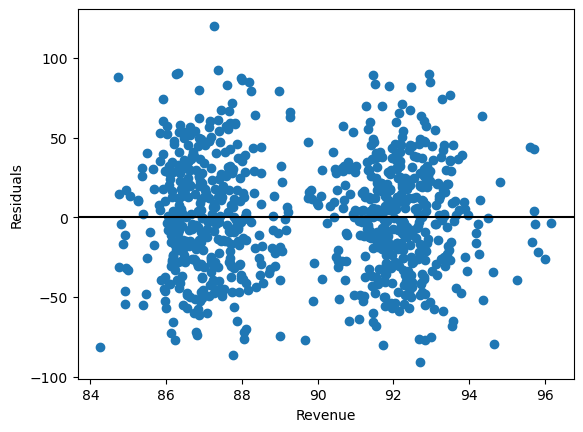

In [31]:
residuals = train['qrt_revenue'] - train_pred

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred, residuals)

The residual plot for the transformed variables is more scagttered, but has two clusters. We believe this is due to the binary categorical nature of the dummy variable `holiday`. To check this, we will plot the residuals for movies released in a holiday season, and separately plot the residuals for movies released in a non-holiday season.

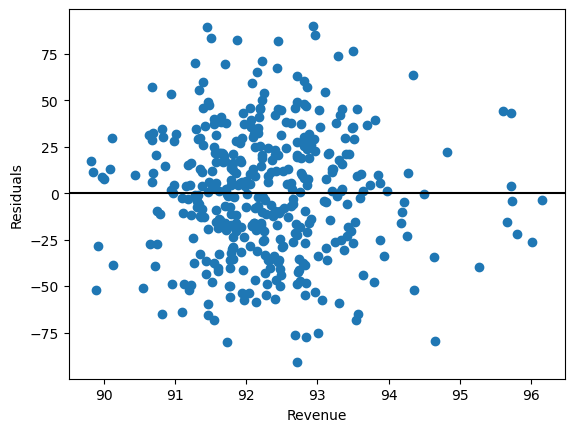

In [36]:
train_holiday = train[train['holiday'] == 1]
train_pred_holiday = train_pred[train['holiday']==1]

residuals = train_holiday['qrt_revenue'] - train_pred_holiday

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred_holiday, residuals)

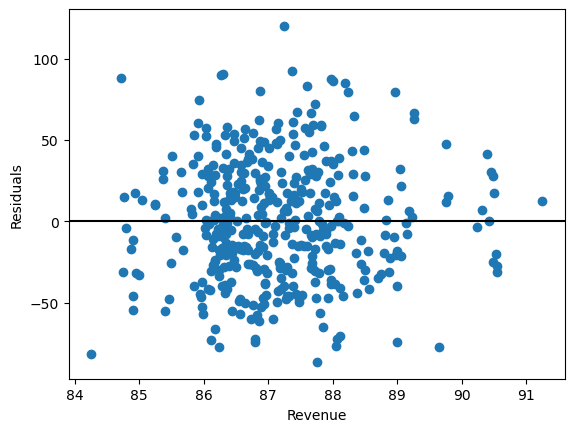

In [37]:
train_non_holiday = train[train['holiday'] == 0]
train_pred_non_holiday = train_pred[train['holiday']==0]

residuals = train_non_holiday['qrt_revenue'] - train_pred_non_holiday

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred_non_holiday, residuals)

The separate residual plots for movies released in a holiday season and movies released in a non-holiday season are both random and scattered. Thus, a linear regression is appropriate for this data.

In [28]:
Y = data['qrt_revenue']
x = data[input_vars]
x = sm.add_constant(x)
model = sm.OLS(Y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            qrt_revenue   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.259
Date:                Mon, 09 Dec 2024   Prob (F-statistic):             0.0801
Time:                        19:26:39   Log-Likelihood:                -5105.7
No. Observations:                1030   AIC:                         1.022e+04
Df Residuals:                    1026   BIC:                         1.024e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             90.9618      9.558      9.

The coefficient for `holiday` is about 5.17, meaning that if a movie is released during a holiday season, the revenue is expected to increase by about 5.17% compared to movies released during non-holiday seasons, all else equal.

For `rating_average`, for every 1% increase in the movie's average MovieLens rating, the revenue is expected to decrease by about 1.41%, all else equal. For `vote_average`, for every 1% increase in the movie's average TMDB vote, the revenue is expected to increase by about 0.14%, all else equal.

The p_value for `holiday` is 0.016, which is lower than our significance level of 0.05. This means that this value is statistically significant, and we can reject our null hypothesis that there is no relationship between holiday season and revenue. 

## Conclusions

### What key factors influence a movie's box office success, and how do these factors differ across various genres?

Based on our analyses, we have determined that budget and season of release have the greatest influence on a movie’s box office success. A high budget used to produce the movie is a predictor of a higher revenue generated. As for the season, movies released in a holiday season, either winter (December-February) or summer (June-August), typically generate higher revenue. A movie’s runtime showed a positive but weaker relationship revenue, suggesting that longer movies might slightly outperform shorter ones in box office returns. A higher vote average on TMDB correlated positively but modestly with revenue. Higher rating averages from MovieLens were associated with a slight decrease in revenue, suggesting that critically acclaimed movies might not always align with popular appeal.

## Limitations

Our dataset’s largest limitation is that it was created by an individual on Kaggle which means the quality, completeness, and accuracy of the data are dependent on the creator's methods and sources. While the dataset compiles information from trusted platforms like TMDB and MovieLens, it may still suffer from issues such as incomplete records, outdated data (as it only includes movies released on or before July 2017), and subjective interpretations of genres and ratings.

The dataset that we use will inherently have bias because movie reviews are user-generated and are subjective. Highly-rated movies may attract more votes, while lesser-known films may receive fewer ratings which can skew the average rating of a movie. There could also be temporal bias, where older movies may have fewer ratings or skewed perceptions compared to newer films that have more exposure. Genre classifications can be subjective, leading to inconsistencies in how movies are categorized. Ratings can differ significantly by region or demographic, which is not captured in the dataset. Movie review systems like IMDb are constantly updated, which can lead to versioning issues if datasets are not synchronized properly. Especially because the data contains movies released prior to or on July 2017, this does not account for the most recent movies released.

## Appendix

Pangarker, N.A. & Smit, Eon. (2013). The determinants of box office performance in the film industry revisited. South African Journal of Business Management. 44. 47-58. 10.4102/sajbm.v44i3.162. 

Selvaretnam, Geethanjali & Yang, Jen-Yuan, 2015. "Factors Affecting the Financial Success of Motion Pictures: What is the Role of Star Power?," SIRE Discussion Papers 2015-19, Scottish Institute for Research in Economics (SIRE).